# Data notes

### Train 
- 6 classes
- Separate medial and lateral tibial cartilage masks
- Separate medial and lateral meniscus masks combined

### Validation
- 6 classes
- Separate medial and lateral tibial cartilage masks
- Separate medial and lateral meniscus masks combined


### Test 
- 4 classes
- Tibial cartilage masks combined
- Meniscus masks combined


For training, the medial and lateral masks for the for the tibial cartilage and meniscus will be combined. 

### HDF5 Notes
- Images are in HDF5 format 
- HDF5 - *hierarchical data format* - verison 5
- HDF5 is like a file system within a file: it has a root path and datasets are underneath directories
- Two key objects:
    - Datasets
    - Groups

- Datasets can be chunked:
    - Linear vs chunked
    - Don't have to read whole file - faster

- HDF5 filters:
    - Every time you write/read, it first passes thorugh the filter and is read/written
    - Takes CPU processing
    - Can increase efficiency by reducing disk I/O 
    - Filter example: gzip
        - Compression algorithm - takes data and compresses it

## Import libraries

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

## Load data

In [2]:
os.getcwd()

'c:\\Users\\james\\Documents\\projects\\pred-knee-replacement-oai\\notebooks'

In [3]:
# Set raw data location
DATA_RAW_LOC = "./../data/raw"

In [5]:
# Define data directory
DATA_DIRECTORY = 'C:\\Users\\james\\OneDrive - University of Leeds\\1. Projects\\1.1 PhD\\1.1.1 Project\\Data\\OAI Subset'
DATA_TRAIN_DIRECTORY = 'C:\\Users\\james\\OneDrive - University of Leeds\\1. Projects\\1.1 PhD\\1.1.1 Project\\Data\\OAI Subset\\train'
DATA_VALID_DIRECTORY = 'C:\\Users\\james\\OneDrive - University of Leeds\\1. Projects\\1.1 PhD\\1.1.1 Project\\Data\\OAI Subset\\valid'
DATA_TEST_DIRECTORY = 'C:\\Users\\james\\OneDrive - University of Leeds\\1. Projects\\1.1 PhD\\1.1.1 Project\\Data\\OAI Subset\\test'


DATA_RAW_DIRECTORY = '..\\data\\raw'
DATA_PROCESSED_DIRECTORY = '..\\data\\processed'
DATA_INTERIM_DIRECTORY = '..\\data\\processed'

RESULTS_PATH = '..\\results'
MODELS_PATH = '..\\models'
MODELS_CHECKPOINTS_PATH = '..\\models\\checkpoints'

In [6]:
# Set path for image and train_train_segmentation - 1 example
valid_img_path = DATA_RAW_LOC + '/valid_001_V00.im'
valid_seg_path = DATA_RAW_LOC + '/valid_001_V00.seg'

In [7]:
# Images are in HDF5 format 

# Load in fname_img using h5py and convert to numpy array
with h5py.File(valid_img_path,'r') as hf:
    print(f"data type: {type(hf)}")
    valid_img = np.array(hf['data'])

print(f"Image shape: {valid_img.shape}")

data type: <class 'h5py._hl.files.File'>
Image shape: (384, 384, 160)


In [8]:
# Check type of output
print(type(valid_img))

# Check flattend output size 
print(valid_img.flatten().shape)

<class 'numpy.ndarray'>
(23592960,)


In [9]:
print(f"Max image value: {max(valid_img.flatten())}")
print(f"Min image value: {min(valid_img.flatten())}")

Max image value: 0.01721217669546604
Min image value: 0.0


## Load example train data

In [94]:
# Extract one image from the training set (the first one) to have closer look at
split = "train"
data_dir = DATA_DIRECTORY
split_dir = os.path.join(DATA_DIRECTORY, split)
file_paths = os.listdir(split_dir)
train_path = file_paths[173][:-4]

# train_044_V00.seg

print(train_path)


train_044_V00


In [95]:
# Test data is arranged differently, and as mask is numpy as opposed to h5py
# Load image and segmentation mask from test data (numpy arrays)

# Create path for single example train image 
train_im_path = os.path.join(data_dir, split, train_path + '.im')
train_seg_path = os.path.join(data_dir, split, train_path + '.seg')

# Open the image file
with h5py.File(train_im_path,'r') as hf:
    train_image = np.array(hf['data'])

# Load the mask
with h5py.File(train_seg_path,'r') as hf:
    train_seg = np.array(hf['data'])

In [96]:
# Shape of single ground truth segmentation mask example  
train_seg.shape

(384, 384, 160, 6)

In [97]:
# Example 
train_seg[240,200,45]

array([0, 0, 0, 0, 0, 0], dtype=uint8)

## Load example test data

In [12]:
split = "test"
data_dir = DATA_DIRECTORY
split_dir = os.path.join(DATA_DIRECTORY, split)
print(split_dir)
test_file_paths = os.listdir(split_dir)

# Choose first test image
test_path = test_file_paths[0][:-3]
print(test_path)

# Test data is arranged differently, and as mask is numpy as opposed to h5py
# Load image and segmentation mask from test data (numpy arrays)
test_im_path = os.path.join(data_dir, split, test_path + '.im')
test_seg_path = os.path.join(data_dir, "test_gt", test_path + '.npy')

# Open the image file
with h5py.File(test_im_path,'r') as hf:
    test_image = np.array(hf['data'])

# Load the mask
test_mask = np.load(test_seg_path)

C:\Users\james\OneDrive - University of Leeds\1. Projects\1.1 PhD\1.1.1 Project\Data\OAI Subset\test
test_001_V00


### Test data mask elements
Test masks have four elements for every voxel in the following order:

['Femoral Cart.', 'Tibial Cart.', 'Patellar Cart.', 'Meniscus']

The medial and lateral masks for the tibial cartilage are combined. The medial and lateral masks for the meniscus are also combined.  

In [46]:
test_mask.shape

(384, 384, 160, 4)

## Plotting: example training image slices

In [98]:
train_image.shape

(384, 384, 160)

In [99]:
# Check plotting function 
# num_subplots = 5

# num_slices = train_image.shape[-1]
# interval_size = num_slices // num_subplots**2

# for cnt, slnum in enumerate(range(0, num_slices, interval_size)):
#     print(cnt, slnum)

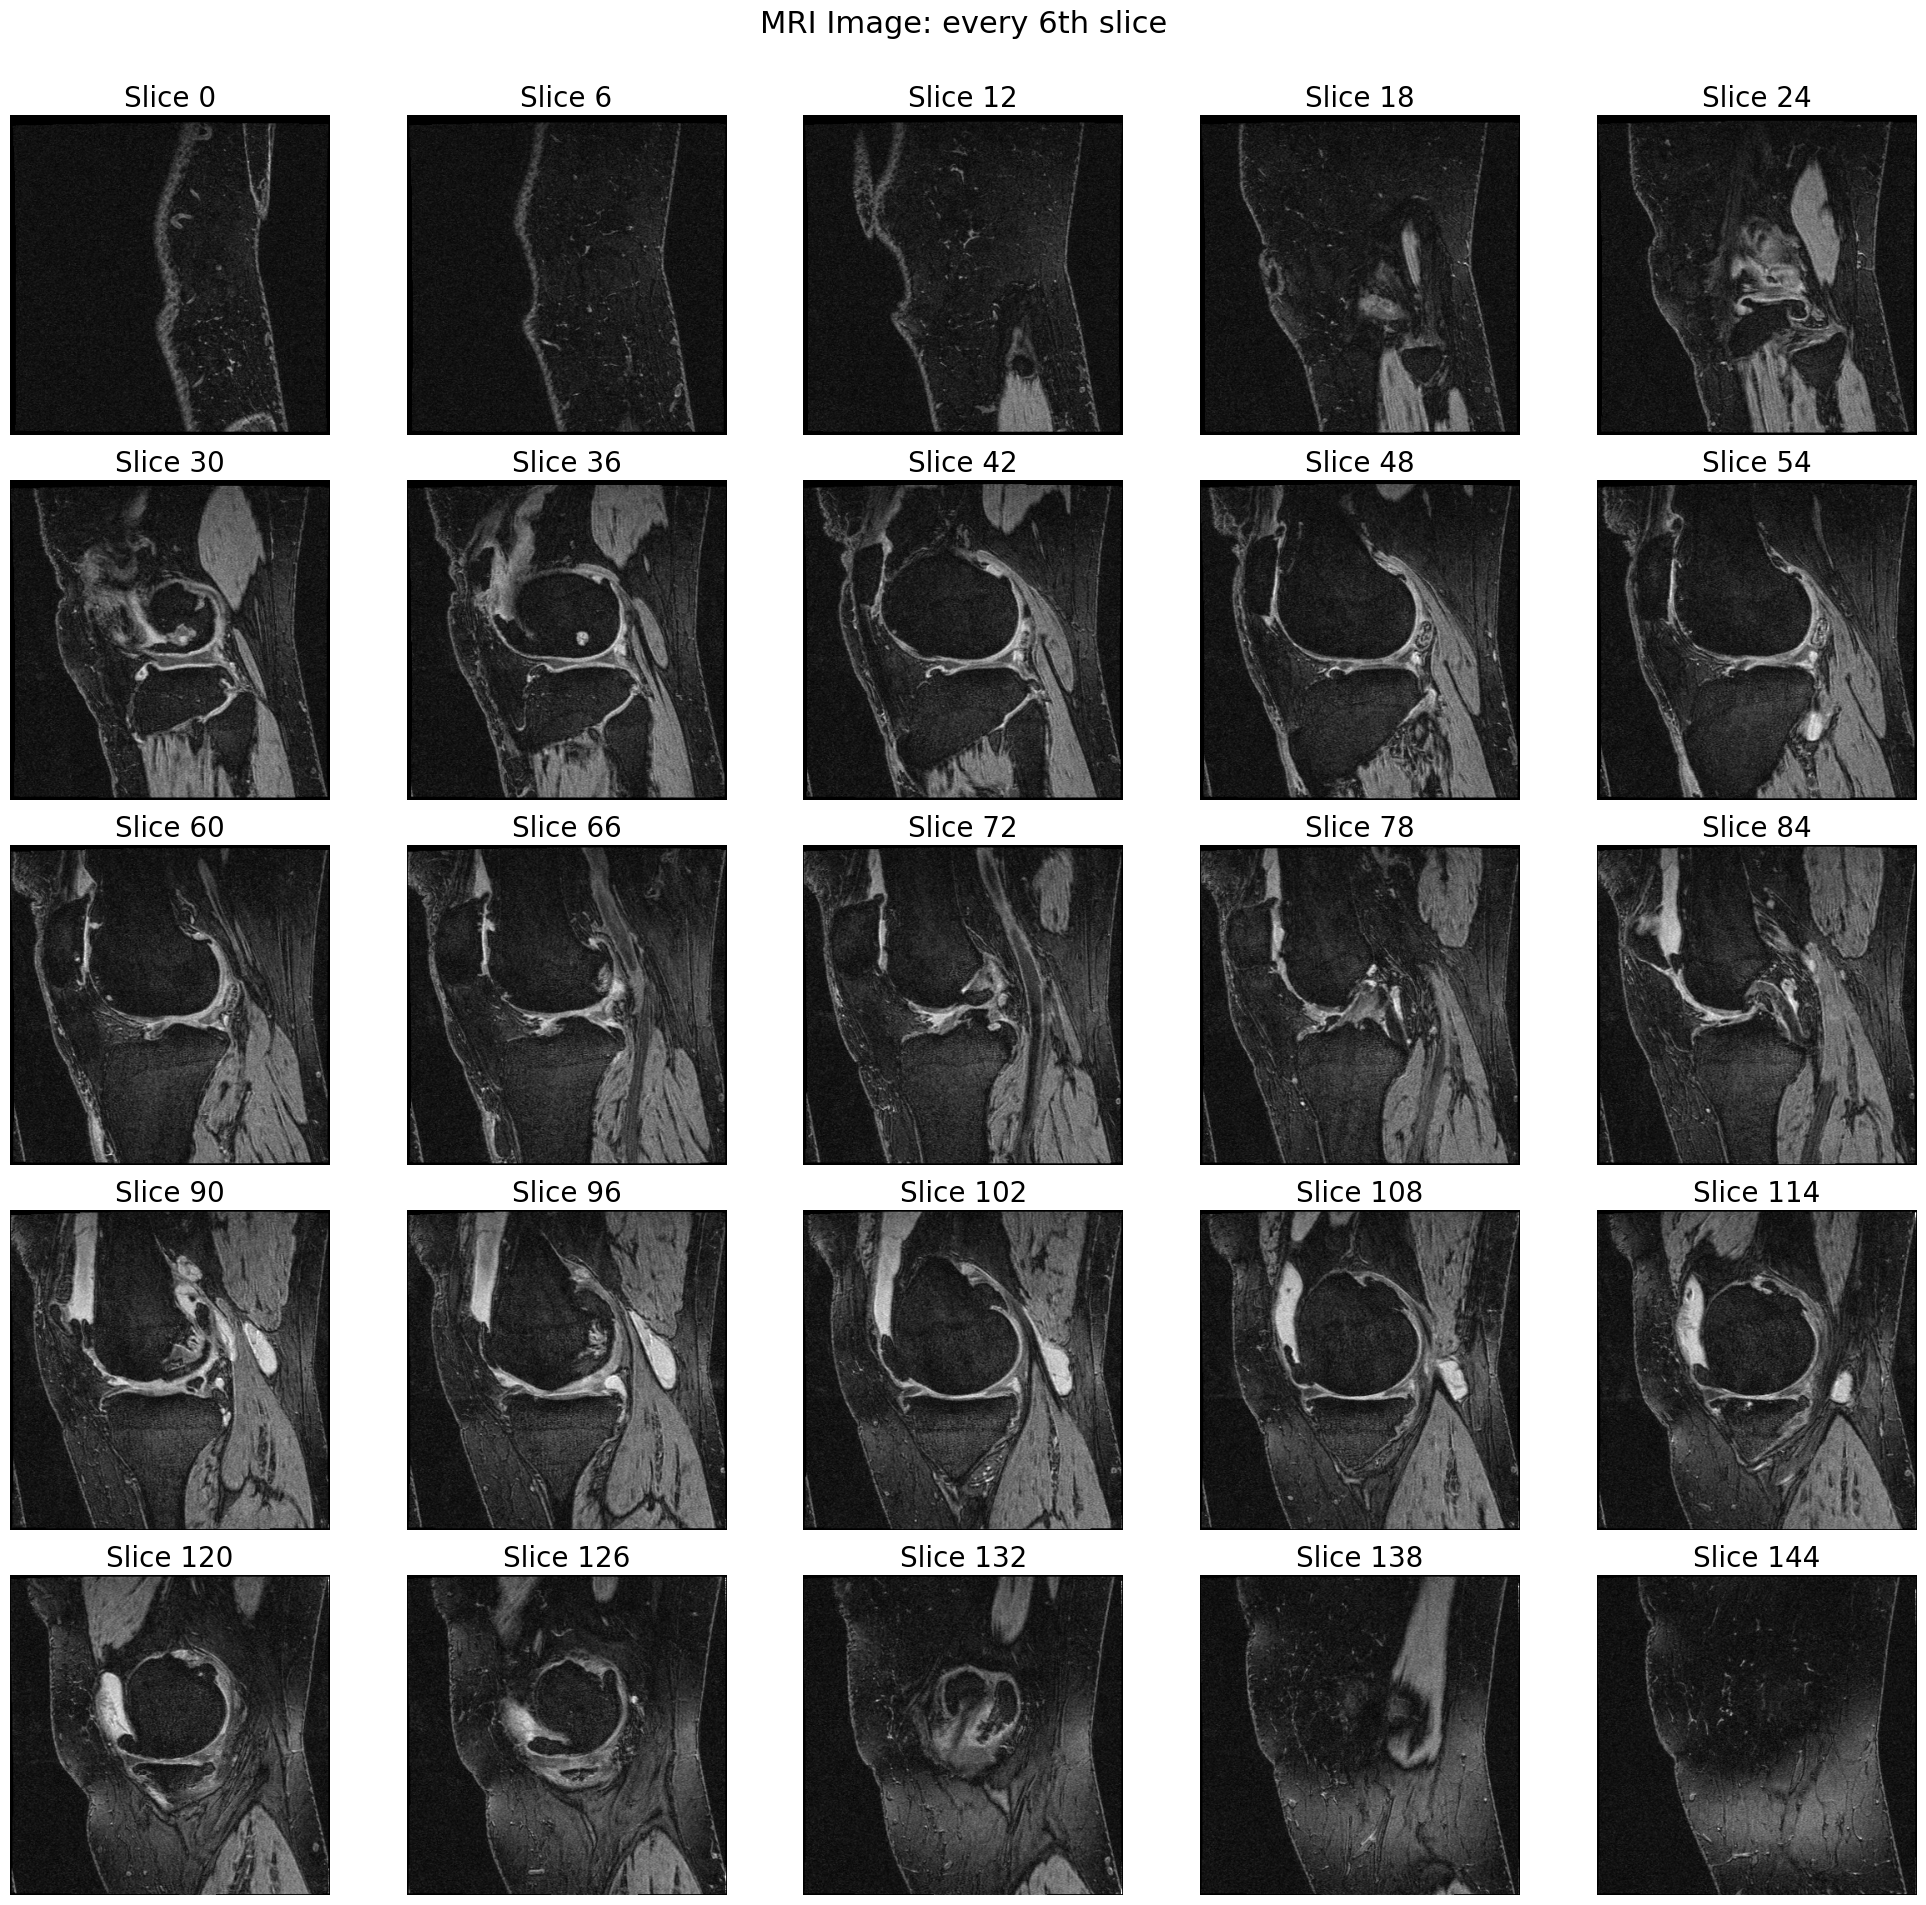

In [100]:
# Define nmber of horizontal and vertical subplots
num_subplots = 5

# Define subplots as num_subplots x num_subplots grid - figure size also defined as a multiple subplots
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

# Step size is num_slices / num_subplots
step_size = train_image.shape[-1]//num_subplots**2

# From 0 to the final slice (160) in 
for cnt, slnum in enumerate(range(0,train_image.shape[-1],step_size)):

    # If your still in the first num_subplots x num_subplots iterations 
    if cnt < num_subplots**2:

        # For the relevant subplot
        plt.subplot(num_subplots, num_subplots, cnt+1)
        
        # Plot the relevant slice number, visualising values in the range 0 to 0.005
        plt.imshow(train_image[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')
        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')
        

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle(f"MRI Image: every {step_size}th slice", fontsize=22)
plt.show()

## Train: plotting mean of segmentations mask (six cartilage types)

Each segmentation map is a numpy array of 384x384x160x6

384 x 384 = image size \
160 = number of slices \
6 = number of segmentation maps for each type of cartilage

Order of segmentation masks: ['Femoral Cart.', 'Medial Tibial Cart.', 'Lateral Tibial Cart.', 'Patellar Cart.', 'Lateral Meniscus', 'Medial Meniscus']


In [101]:
# Check segmentation shape
train_seg.shape

(384, 384, 160, 6)

In [102]:
print(train_seg[-1,:,:,-1].shape)
print(train_seg[-1,...,-1].shape)

(384, 160)
(384, 160)


In [103]:
# Calculate the mean of each slice at each xy coord for each cartilage type
train_seg_means = np.mean(train_seg, 2)
train_seg_means.shape

(384, 384, 6)

In [104]:
# Extract the first two cartilage-tpye masks and stack them
np.stack([train_seg[...,0], train_seg[...,1]], axis=-1).shape

(384, 384, 160, 2)

In [105]:
# np.stack example
a = np.array([
    [1,1],
    [1,1],
    [1,1]]
)

b = np.array([[0,0],[0,0],[0,0]])

np.stack([a,b]).shape

(2, 3, 2)

The brighter the pixel, the more frequently the type of cartilage appear at that location

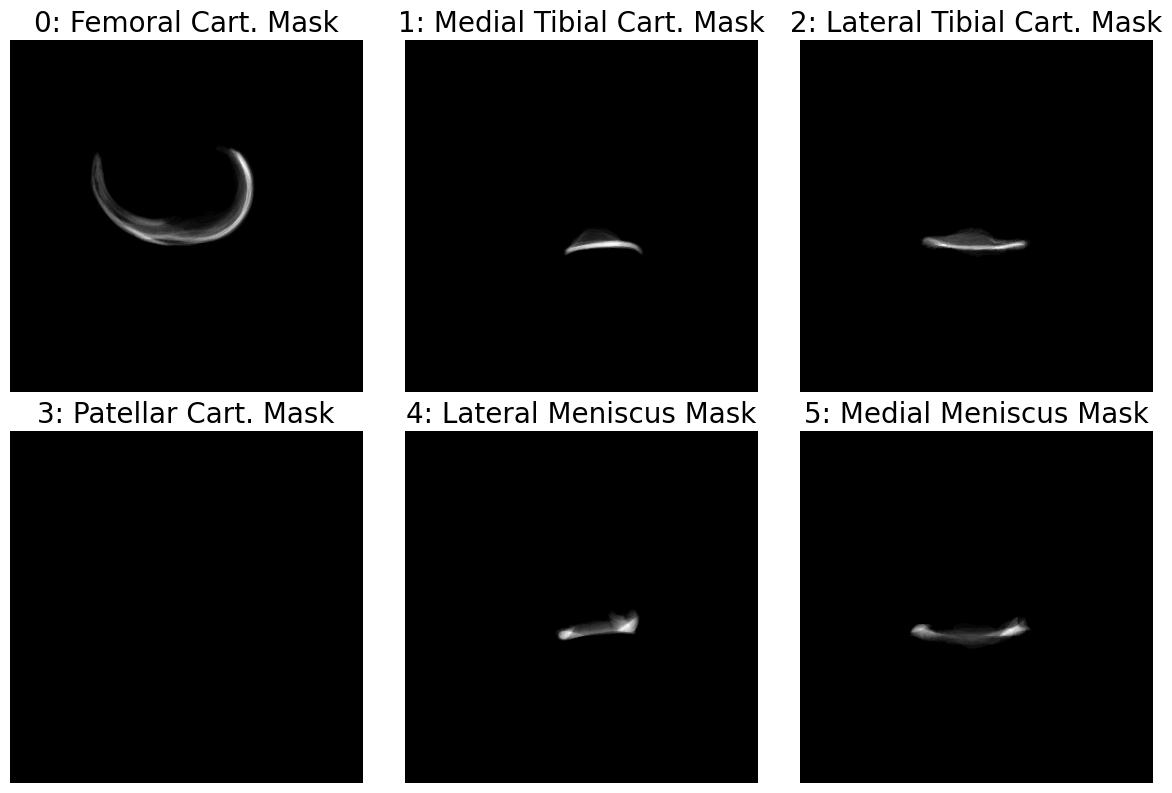

In [106]:
# For each cartilage type, plot the slice-averaged segmentation mask

# Define cartilage labels
fig_captions = ['Femoral Cart.', 'Medial Tibial Cart.', 'Lateral Tibial Cart.', 'Patellar Cart.', 'Lateral Meniscus', 'Medial Meniscus']

# Set up subplots
nrows = 2
ncols = 3
plt.subplots(nrows, ncols, figsize = (ncols*4, nrows*4))

# For each cartilage type
for cnt, cart_type in enumerate(range(0,6)):
    
    # Access the subplots
    plt.subplot(nrows, ncols, cnt+1)
    # Plot the mean of all the segmentation maps for the cartilage type
    plt.imshow(train_seg_means[...,cart_type], cmap = 'gray')
    plt.title(f'{cnt}: {fig_captions[cnt]} Mask', fontsize = 20)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Test: plotting mean of segmentations mask (four cartilage types)

In [58]:
# Calculate the mean of each slice (160 slices) at each xy coord for each cartilage type
test_seg_means = np.mean(test_mask, 2)
test_seg_means.shape

(384, 384, 4)

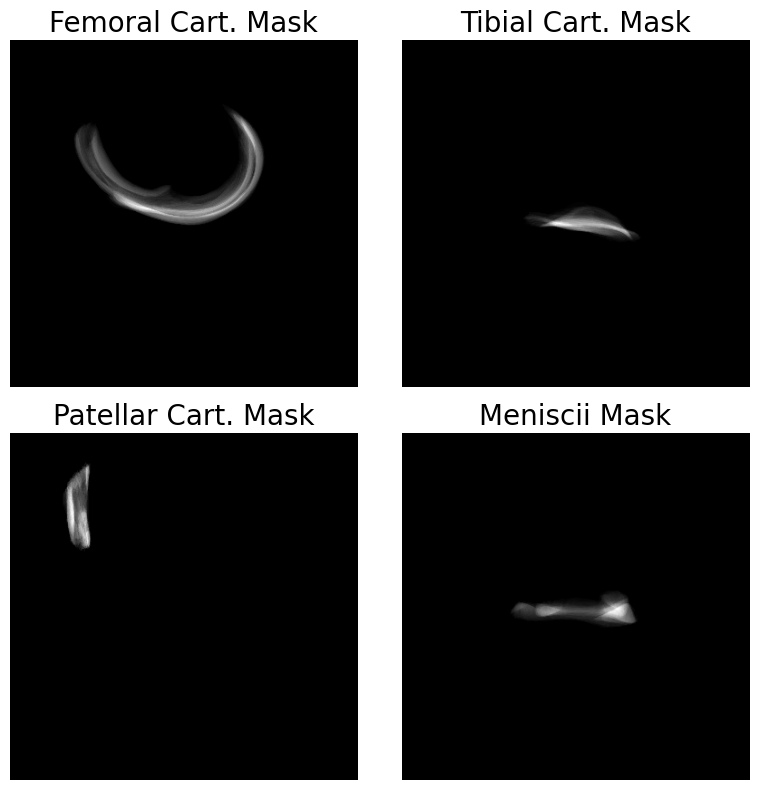

In [59]:
# For each cartilage type, plot the slice-averaged segmentation mask

# Define cartilage labels
fig_captions = ['Femoral Cart.', 'Tibial Cart.', 'Patellar Cart.', 'Meniscii']

# Set up subplots
nrows = 2
ncols = 2
plt.subplots(nrows, ncols, figsize = (ncols*4, nrows*4))

# For each cartilage type
for cnt, cart_type in enumerate(range(0,4)):
    
    # Access the subplots
    plt.subplot(nrows, ncols, cnt+1)
    # Plot the mean of all the segmentation maps for the cartilage type
    plt.imshow(test_seg_means[...,cart_type], cmap = 'gray')
    plt.title('{} Mask'.format(fig_captions[cnt]), fontsize = 20)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Train: Plot Medial and Lateral Meniscus Masks Separately 

In [130]:
# Define each tissue mask
train_fem_cart = train_seg[:,:,:,0]
train_tib_med_cart = train_seg[:,:,:,1]
train_tib_lat_cart = train_seg[:,:,:,2]
train_pat_cart = train_seg[:,:,:,3]
train_men_lat = train_seg[:,:,:,4]
train_men_med = train_seg[:,:,:,5]

# Check shape
train_fem_cart.shape


(384, 384, 160)

#### Train: Plot lateral meniscus mask example

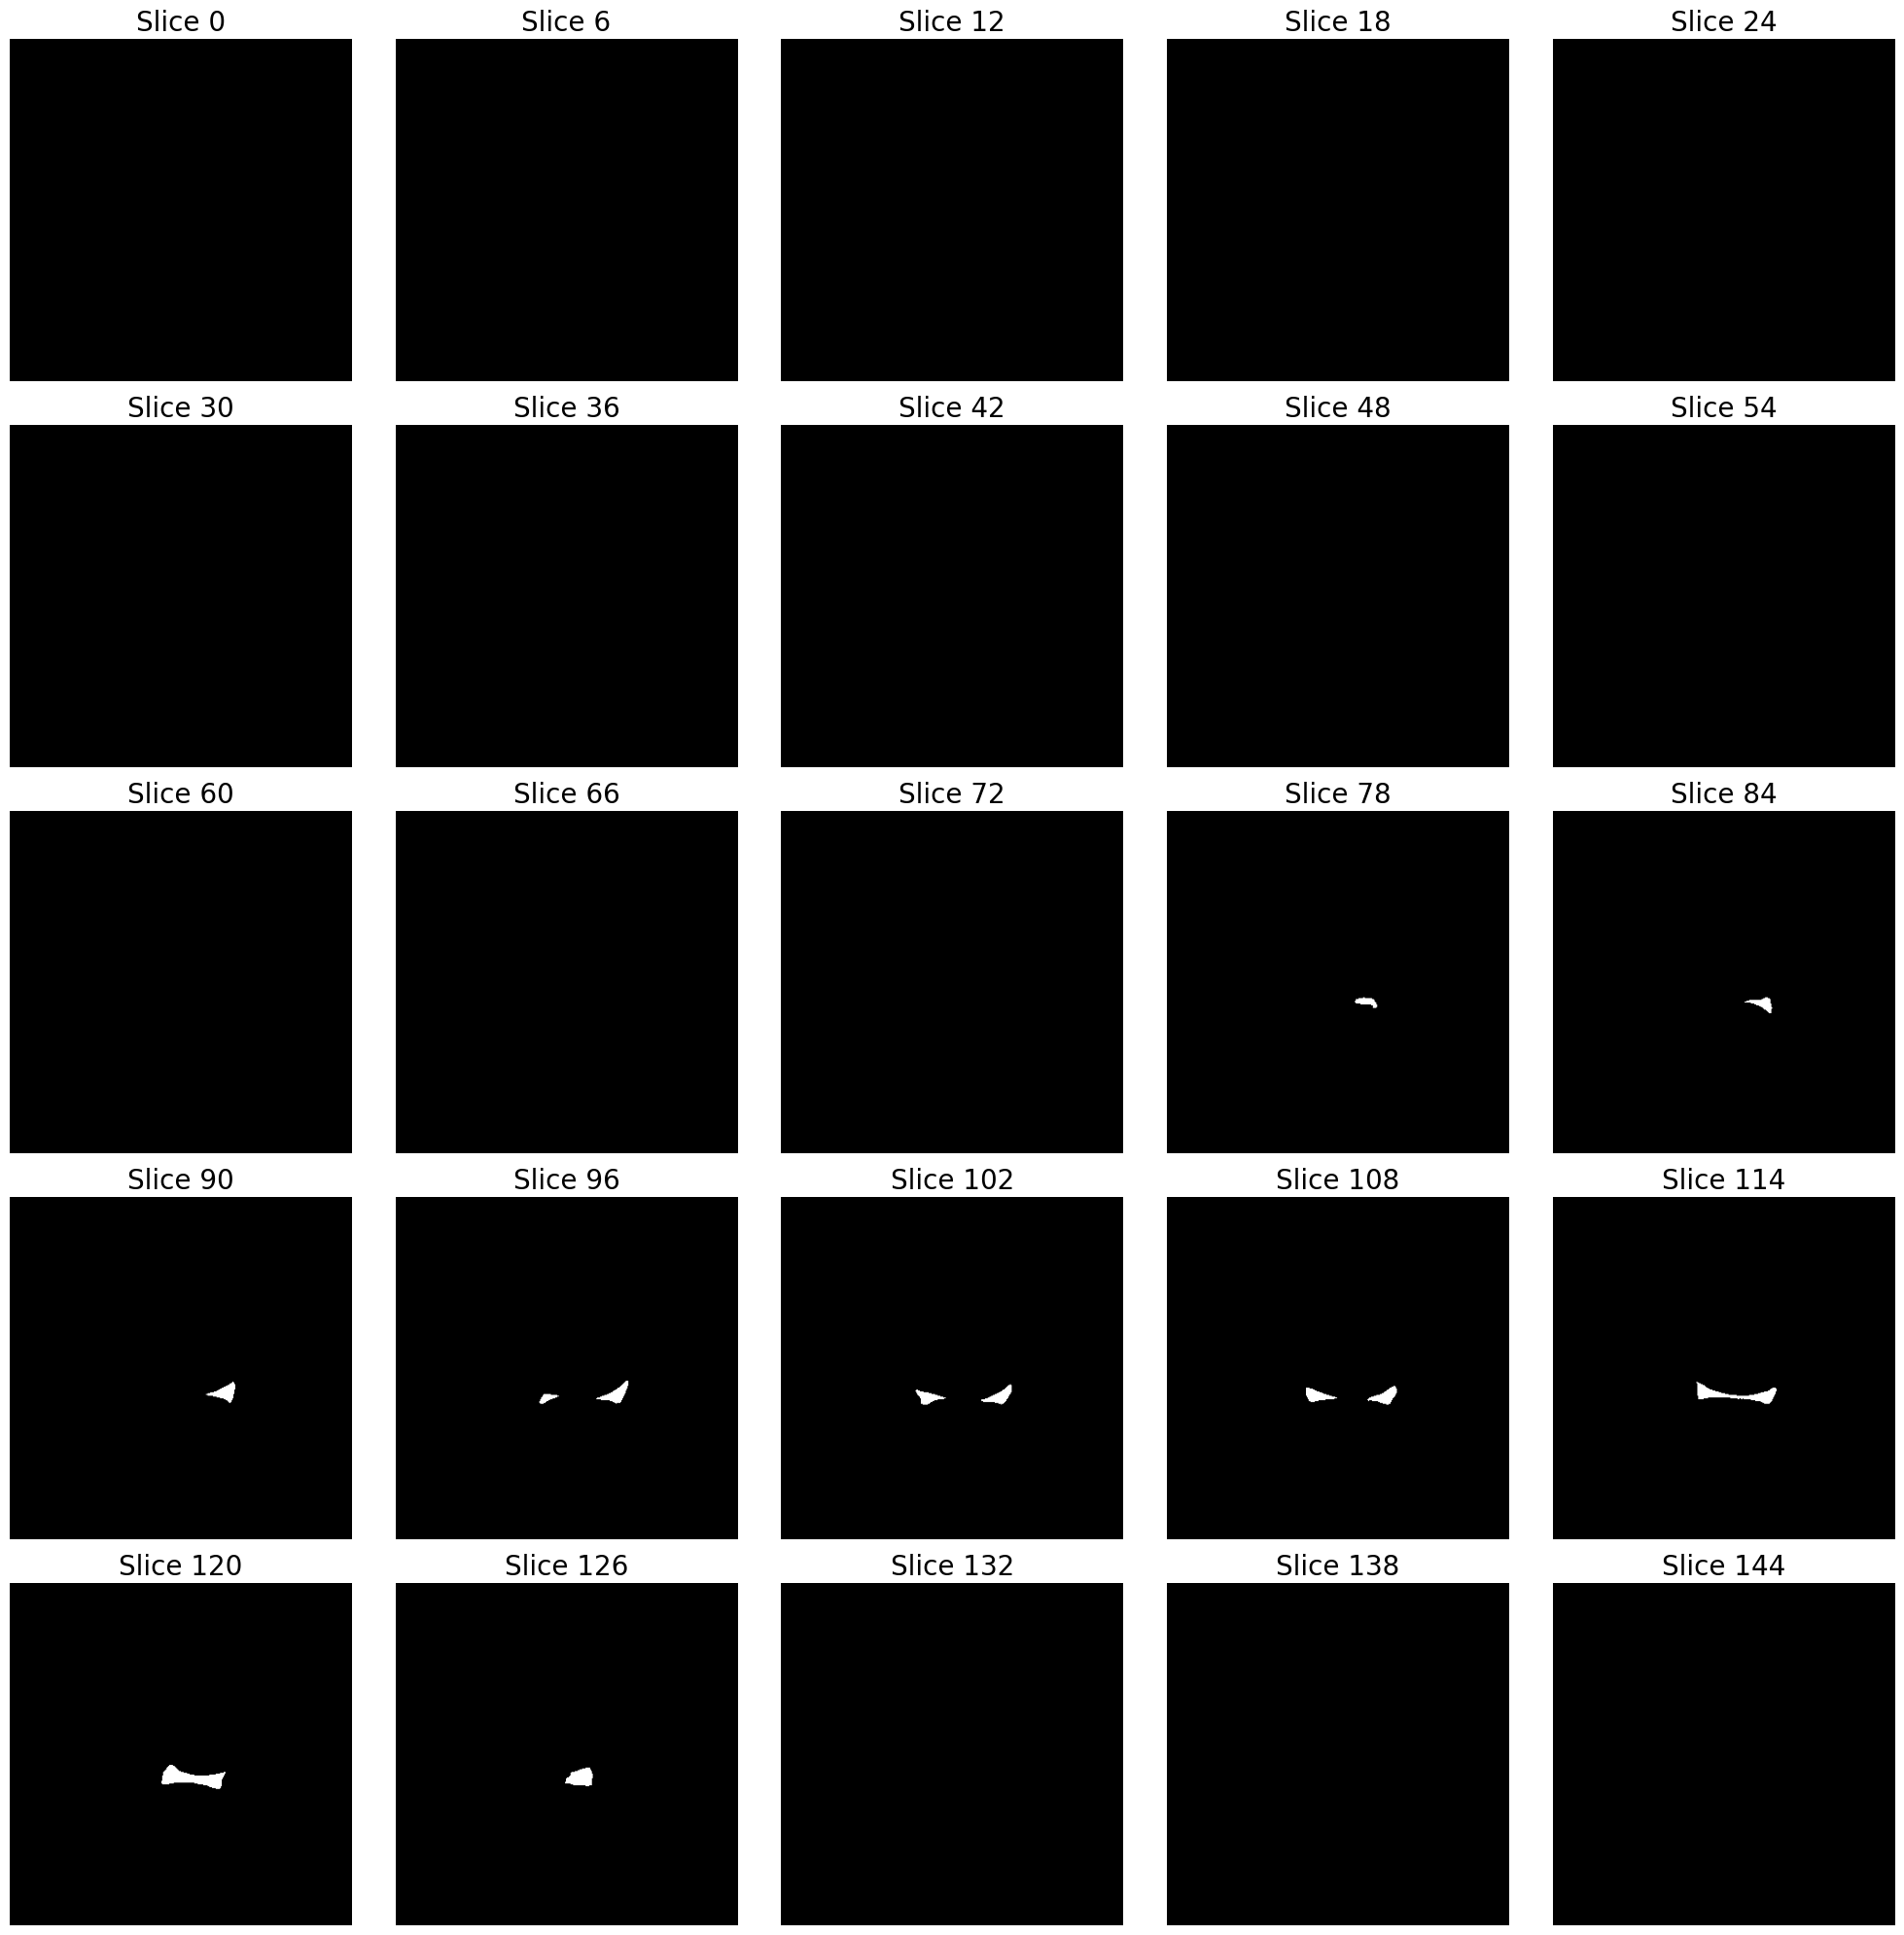

In [63]:
num_subplots = 5
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

for cnt, slnum in enumerate(range(0,train_men_lat.shape[-1],train_men_lat.shape[-1]//num_subplots**2)):

    if cnt < num_subplots**2:

        plt.subplot(num_subplots, num_subplots, cnt+1)
        plt.imshow(train_men_lat[...,slnum], cmap = 'gray')
        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')

plt.tight_layout()
plt.show()

num_subplots = 5
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))


#### Train: Plot medial meniscus mask example

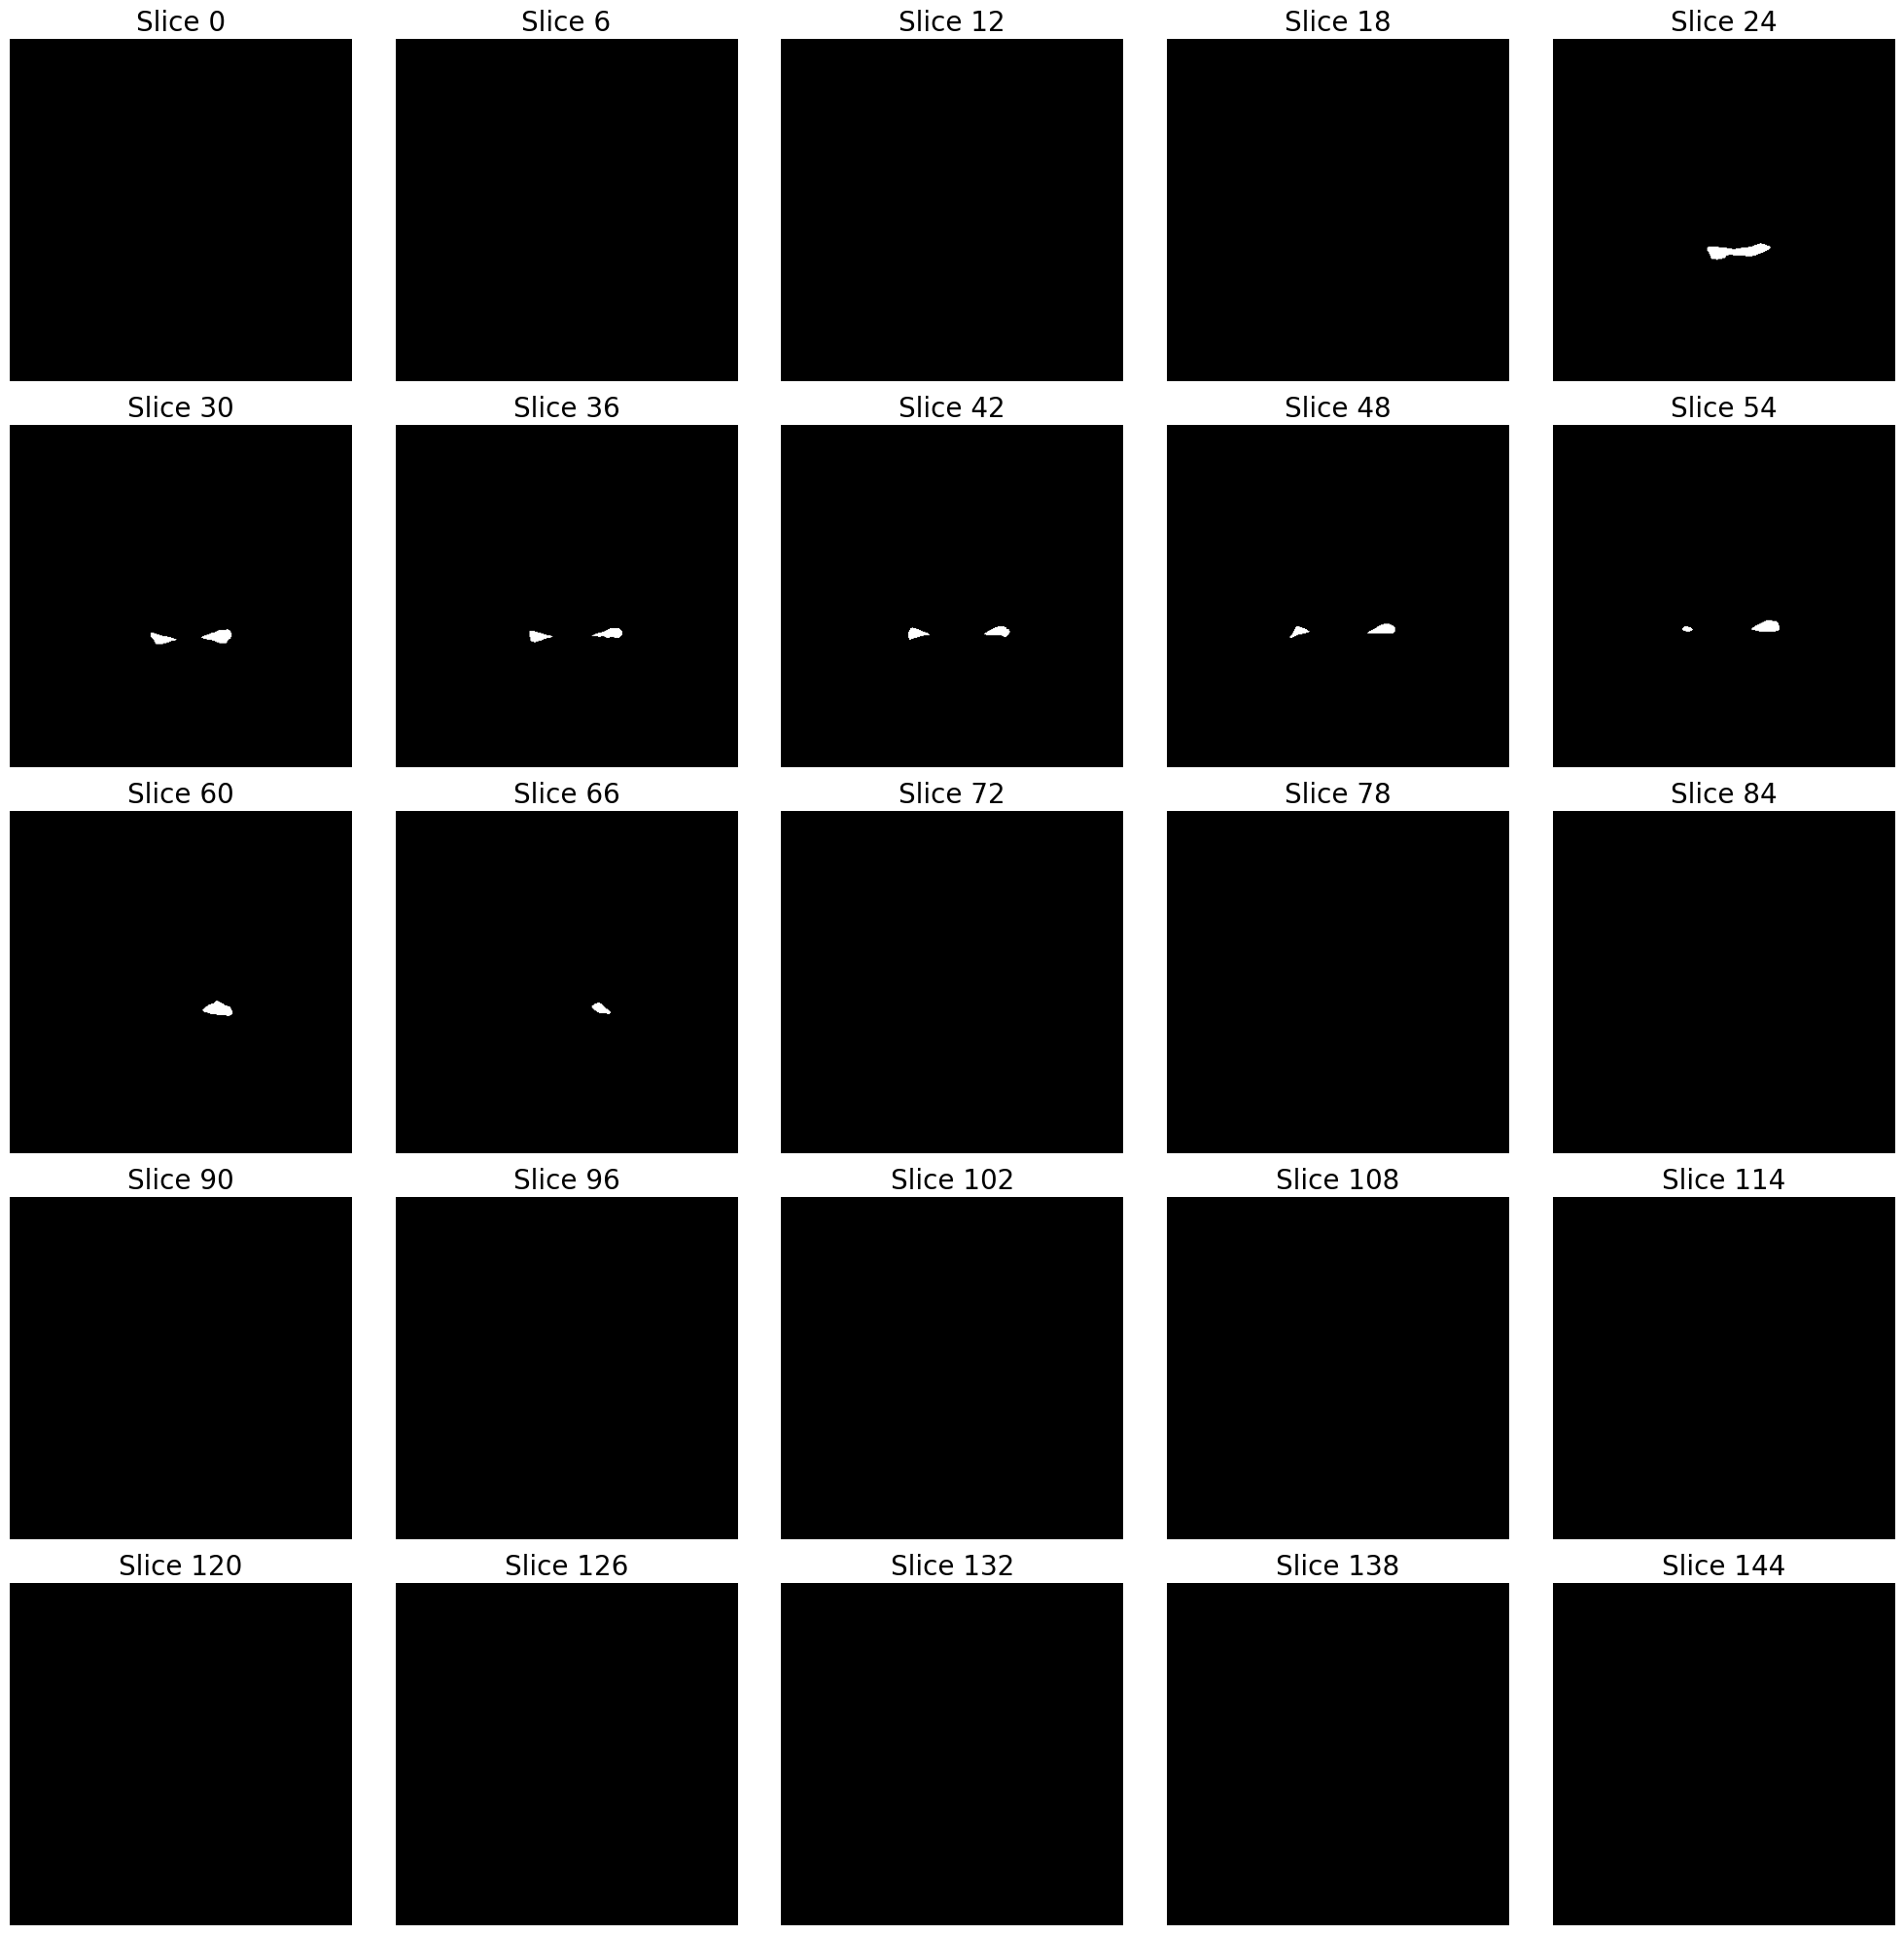

In [64]:
num_subplots = 5
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

for cnt, slnum in enumerate(range(0,train_men_med.shape[-1],train_men_med.shape[-1]//num_subplots**2)):

    if cnt < num_subplots**2:

        plt.subplot(num_subplots, num_subplots, cnt+1)
        plt.imshow(train_men_med[...,slnum], cmap = 'gray')
        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')

plt.tight_layout()
plt.show()

# Train: Plot Segmentation Masks for all Tissue Types for Single Example MRI

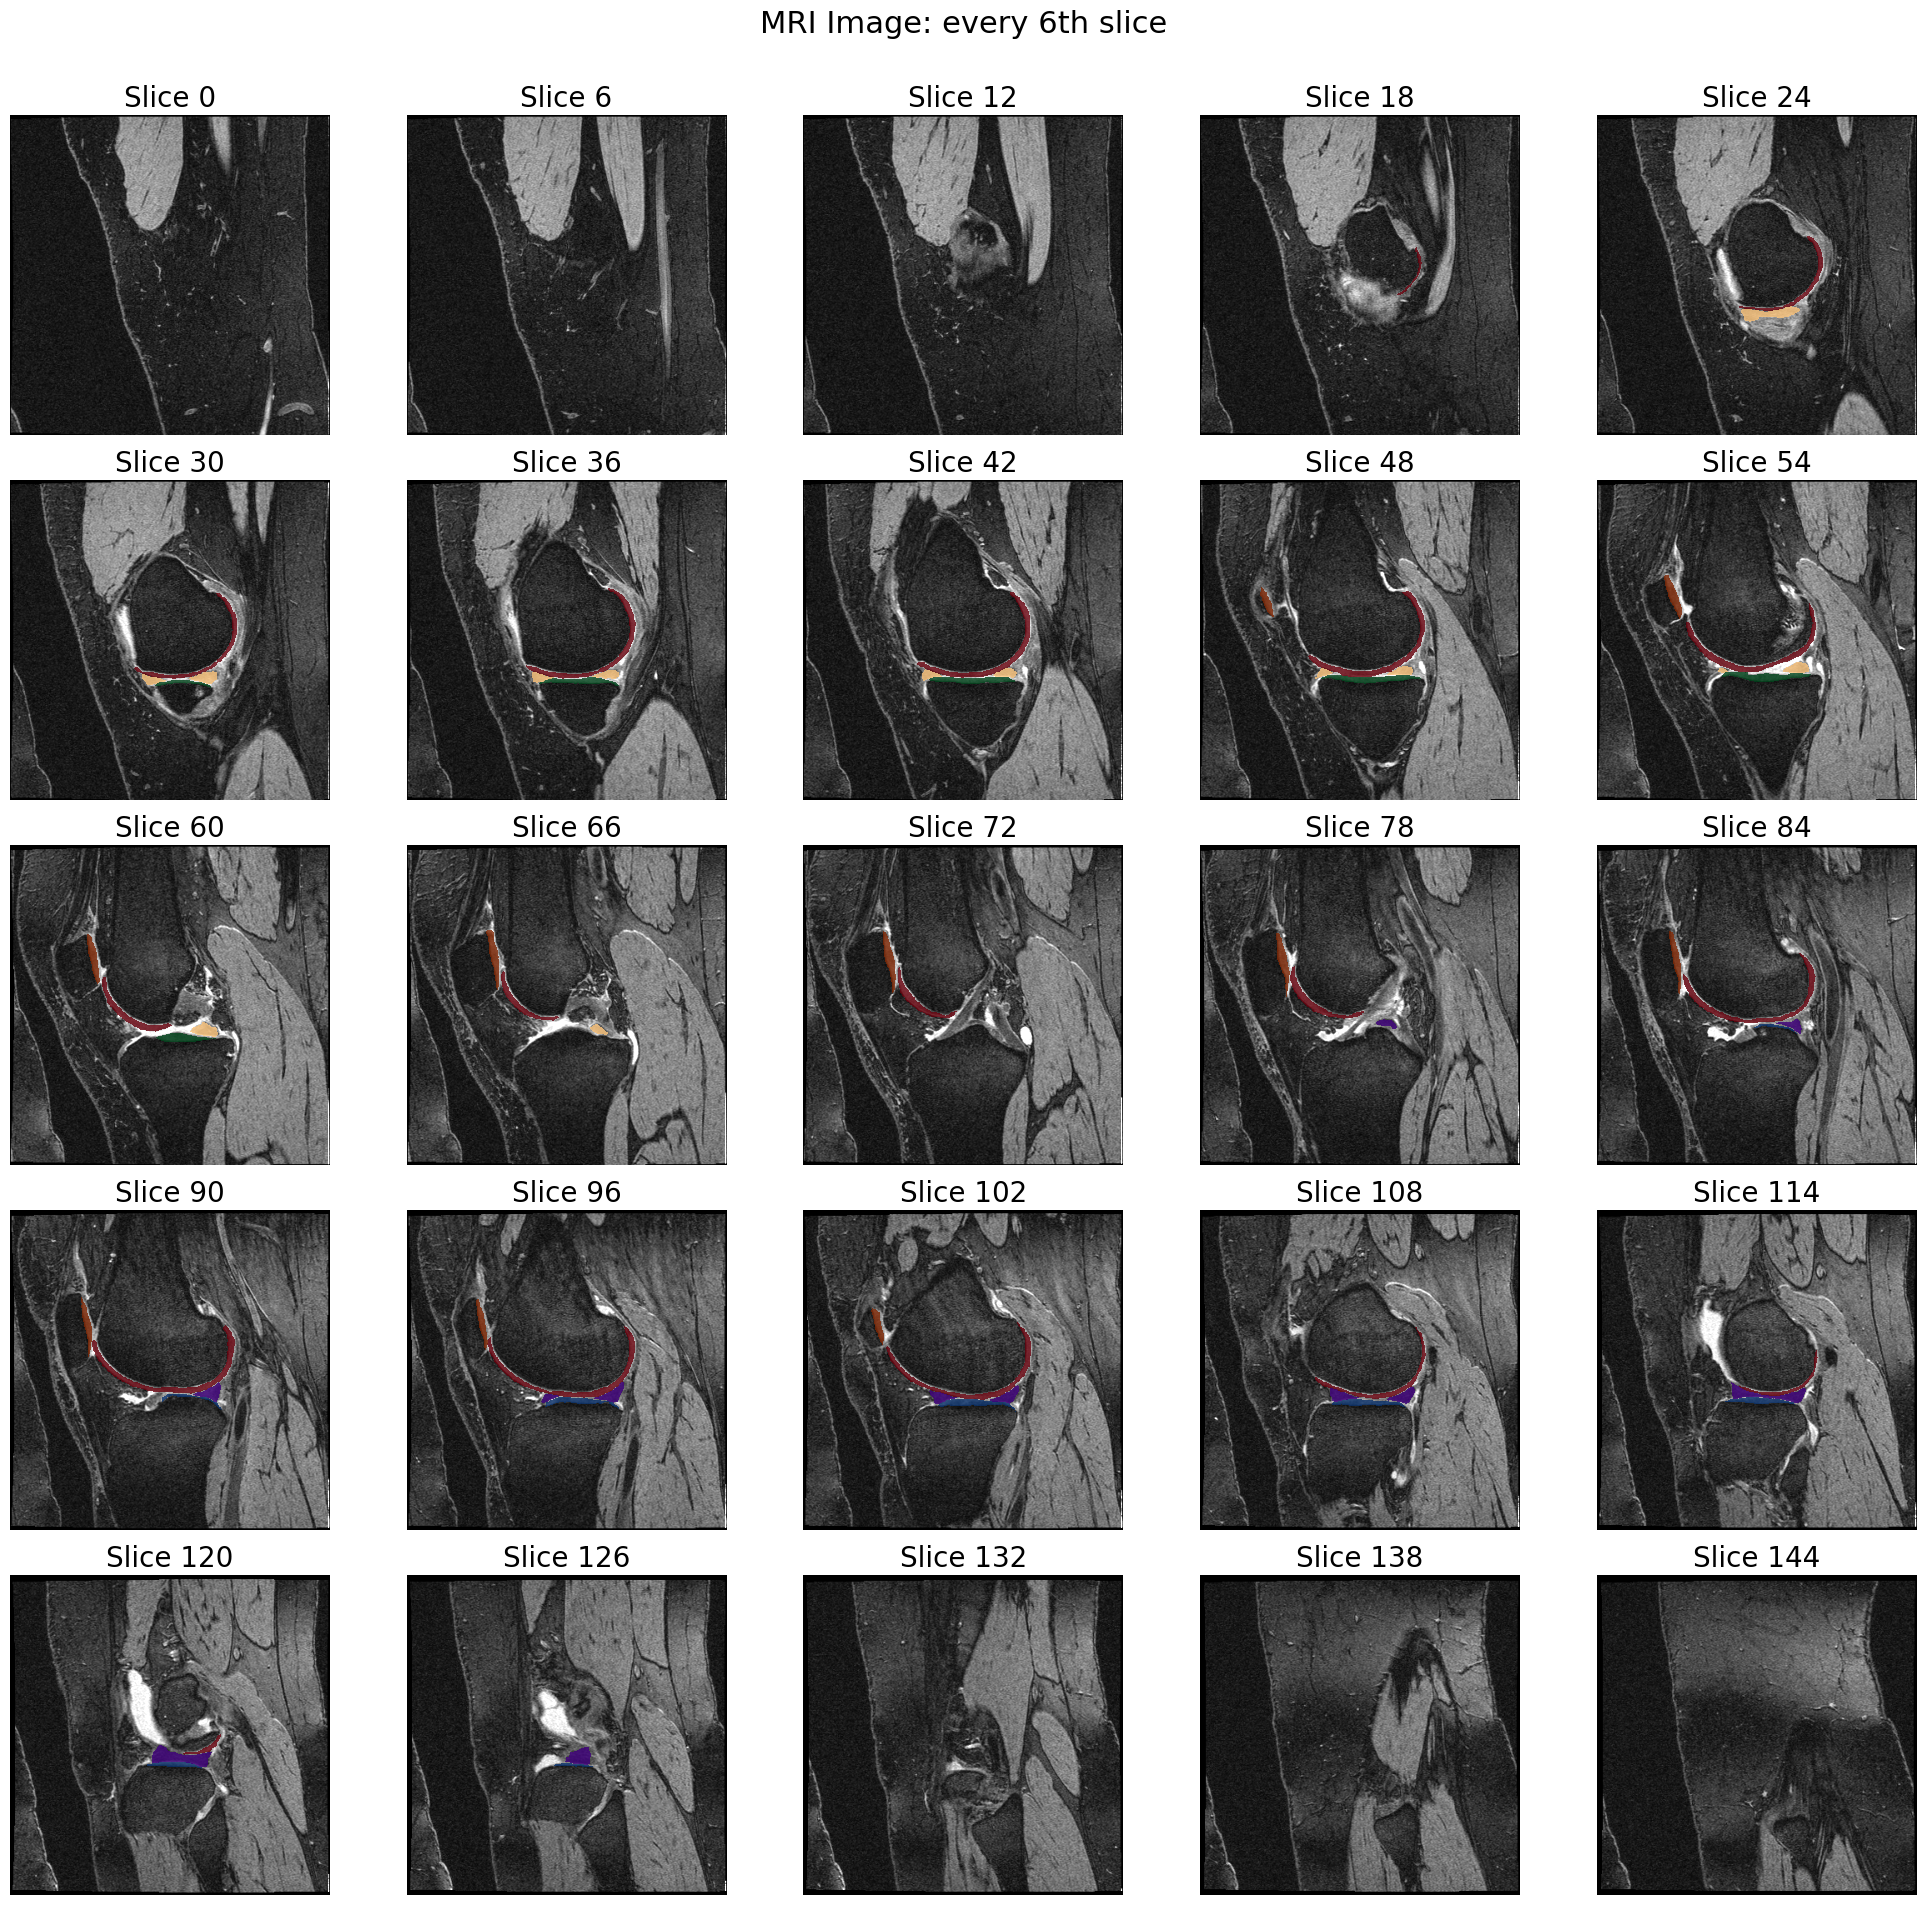

In [60]:
cmaps = ["Reds", "Blues", "Greens", "Oranges", "Purples", "copper"]
fig_captions = ['Femoral Cart.', 'Medial Tibial Cart.', 'Lateral Tibial Cart.', 'Patellar Cart.', 'Lateral Meniscus', 'Medial Meniscus']

# Define nmber of horizontal and vertical subplots
num_subplots = 5

# Define subplots as num_subplots x num_subplots grid - figure size also defined as a multiple subplots
plt.subplots(num_subplots, num_subplots, figsize = (num_subplots*4, num_subplots*4))

# Step size is num_slices / num_subplots
step_size = train_image.shape[-1]//num_subplots**2

# From 0 to the final slice (160) in 
for cnt, slnum in enumerate(range(0,train_image.shape[-1],step_size)):

    # If your still in the first num_subplots x num_subplots iterations 
    if cnt < num_subplots**2:

        # For the relevant subplot
        plt.subplot(num_subplots, num_subplots, cnt+1)
        
        # Plot the relevant slice number, visualising values in the range 0 to 0.005
        plt.imshow(train_image[...,slnum], vmin = 0, vmax = 0.005, cmap = 'gray')

        # Plot segmentation maps
        #plt.imshow(train_seg[:,:,slnum, 0], cmap = 'Reds', alpha=1.0*(train_seg[:,:,slnum, 0]>0), interpolation='none')
        
        # For each type of tissue in the segmentation mask, plot its mask
        for tis_num in range(0, train_seg.shape[-1]):
            #plt.subplot(num_subplots, num_subplots, cnt+1)
            plt.imshow(train_seg[:,:,slnum, tis_num], cmap = cmaps[tis_num], alpha=0.8*(train_seg[:,:,slnum, tis_num]>0), interpolation='none')
            
            #plt.title('Slice {}'.format(slnum), fontsize= 20)
            #plt.axis('off')

        # plt.tight_layout()
        # plt.show()

        plt.title('Slice {}'.format(slnum), fontsize= 20)
        plt.axis('off')
        

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle(f"MRI Image: every {step_size}th slice", fontsize=22)
plt.show()

## Image spans: how much can the image/masks be cropped?

How much of the image does the each type of cartilage span?

In [125]:
print(np.array([[0,0],[0,0]]).shape)
a = np.nonzero([[0,0],[0,0]])
len(a[0])

(2, 2)


0

In [141]:
def spans(mask):
    # Find the indices of non-zero elements in the binary mask
    # np.nonzero returns a tuple of arrays - one for each dimension
    nonzero_indices = np.nonzero(mask)
    
    # print(np.array(nonzero_indices).size)
    # print(np.array(nonzero_indices).shape)


    # The patella cartilage in one training mask is zero everywhere - if statement below accounts for this
    # If segmentation is zero everywhere return a point in the centre of the 384x384x160 volume (i.e. can be cropped to a point)    
    if np.array(nonzero_indices).size == 0:
        nonzero_indices = (np.array([192]), np.array([192]), np.array([80]))

    # Calculate the minimum and maximum coordinates in each dimension
    min_coords = np.min(nonzero_indices, axis=1)
    max_coords = np.max(nonzero_indices, axis=1)

    # span_dict = {"x": (min_coords[0], max_coords[0]), "y": (min_coords[1], max_coords[1]), "z": (min_coords[2], max_coords[2])}

    return min_coords[0], max_coords[0], min_coords[1], max_coords[1], min_coords[2], max_coords[2]
    # return span_dict

In [142]:

b = spans(train_fem_cart)
print(b)

a = spans(train_pat_cart)
print(a)


(115, 225, 87, 265, 25, 131)
(192, 192, 192, 192, 80, 80)


In [143]:
import glob
import os

# Loop through all train/val data and see variation in each span
# DATA_DIR = 'Data'

# Get the paths
train_paths = np.array([i for i in glob.glob(f'{DATA_DIRECTORY}\\train\\*.seg')])
val_paths = np.array([i for i in glob.glob(f'{DATA_DIRECTORY}\\valid\\*.seg')])

print(train_paths.size)

all_paths = np.concatenate((train_paths, val_paths), axis=0)

120


In [144]:
all_paths[0]

'C:\\Users\\james\\OneDrive - University of Leeds\\1. Projects\\1.1 PhD\\1.1.1 Project\\Data\\OAI Subset\\train\\train_001_V00.seg'

In [145]:
entries = []

for path in all_paths:
    entry = []
    entry.append(path)

    # load in segmentation mask file
    with h5py.File(path,'r') as hf:
        seg = np.array(hf['data'])

    # get masks
    # medial = seg[...,-1]
    # lateral = seg[...,-2]

    # Extract cartilage-type masks
    fem_cart = seg[:,:,:,0]
    tib_med_cart = seg[:,:,:,1]
    tib_lat_cart = seg[:,:,:,2]
    pat_cart = seg[:,:,:,3]
    men_lat = seg[:,:,:,4]
    men_med = seg[:,:,:,5]

    # Claculate spans
    
    # medspan = spans(medial)
    # latspan = spans(lateral)

    span_fem_cart = spans(fem_cart)
    span_tib_med_cart = spans(tib_med_cart)
    span_tib_lat_cart = spans(tib_lat_cart)
    span_pat_cart = spans(pat_cart)
    span_men_lat = spans(men_lat)
    span_men_med = spans(men_med)

    # append to entry
    for i in span_fem_cart:
        entry.append(i)
    for i in span_tib_med_cart:
        entry.append(i)
    for i in span_tib_lat_cart:
        entry.append(i)
    for i in span_pat_cart:
        entry.append(i)
    for i in span_men_lat:
        entry.append(i)
    for i in span_men_med:
        entry.append(i)
        
    print(entry)

    entries.append(entry)

['C:\\Users\\james\\OneDrive - University of Leeds\\1. Projects\\1.1 PhD\\1.1.1 Project\\Data\\OAI Subset\\train\\train_001_V00.seg', 127, 239, 96, 274, 17, 122, 214, 241, 150, 256, 83, 128, 220, 249, 145, 266, 26, 64, 101, 183, 72, 111, 48, 104, 202, 233, 151, 262, 78, 126, 211, 248, 137, 256, 21, 67]
['C:\\Users\\james\\OneDrive - University of Leeds\\1. Projects\\1.1 PhD\\1.1.1 Project\\Data\\OAI Subset\\train\\train_001_V01.seg', 114, 224, 84, 262, 30, 135, 201, 227, 148, 246, 97, 141, 208, 237, 132, 251, 37, 77, 90, 170, 60, 98, 62, 120, 186, 226, 141, 252, 95, 140, 200, 235, 127, 242, 34, 79]
['C:\\Users\\james\\OneDrive - University of Leeds\\1. Projects\\1.1 PhD\\1.1.1 Project\\Data\\OAI Subset\\train\\train_002_V00.seg', 45, 188, 86, 298, 7, 136, 161, 197, 176, 292, 81, 136, 158, 210, 131, 284, 18, 69, 35, 126, 54, 104, 57, 126, 148, 187, 163, 275, 81, 136, 153, 202, 121, 278, 17, 70]
['C:\\Users\\james\\OneDrive - University of Leeds\\1. Projects\\1.1 PhD\\1.1.1 Project\\Data

In [146]:
import pandas as pd
df = pd.DataFrame(entries)

In [148]:
df.to_csv('maskspans.csv')

In [149]:
import pandas as pd
df = pd.read_csv('maskspans.csv')

In [150]:
df.head()

Unnamed: 0                                                  0    1    2  \
0           0  C:\Users\james\OneDrive - University of Leeds\...  127  239   
1           1  C:\Users\james\OneDrive - University of Leeds\...  114  224   
2           2  C:\Users\james\OneDrive - University of Leeds\...   45  188   
3           3  C:\Users\james\OneDrive - University of Leeds\...   93  236   
4           4  C:\Users\james\OneDrive - University of Leeds\...  133  252   

    3    4   5    6    7    8  ...   27   28  29   30   31   32   33   34  35  \
0  96  274  17  122  214  241  ...  151  262  78  126  211  248  137  256  21   
1  84  262  30  135  201  227  ...  141  252  95  140  200  235  127  242  34   
2  86  298   7  136  161  197  ...  163  275  81  136  153  202  121  278  17   
3  98  313  11  139  202  247  ...  179  290  79  138  202  250  144  298  16   
4  90  287  20  132  227  266  ...  154  272  19   63  225  266  135  279  92   

    36  
0   67  
1   79  
2   70  
3   69  
4  135  

[5 rows x 38 columns]

In [152]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is D062-F4E5

 Directory of c:\Users\james\Documents\projects\pred-knee-replacement-oai\notebooks

27/08/2024  17:51    <DIR>          .
15/08/2024  15:28    <DIR>          ..
03/06/2024  16:03                 0 .gitkeep
15/08/2024  14:07         9,378,104 data_exploration.ipynb
15/08/2024  14:07            11,538 data_upload_hpc.ipynb
27/08/2024  17:51            38,070 maskspans.csv
15/08/2024  14:07            32,023 model_training.ipynb
21/08/2024  17:36           278,610 results_analysis.ipynb
29/07/2024  13:10    <DIR>          wandb
               6 File(s)      9,738,345 bytes
               3 Dir(s)  290,980,839,424 bytes free


(array([ 3.,  5., 10., 14., 24., 49., 19., 17.,  5.,  2.]),
 array([194. , 204.2, 214.4, 224.6, 234.8, 245. , 255.2, 265.4, 275.6,
        285.8, 296. ]),
 <BarContainer object of 10 artists>)

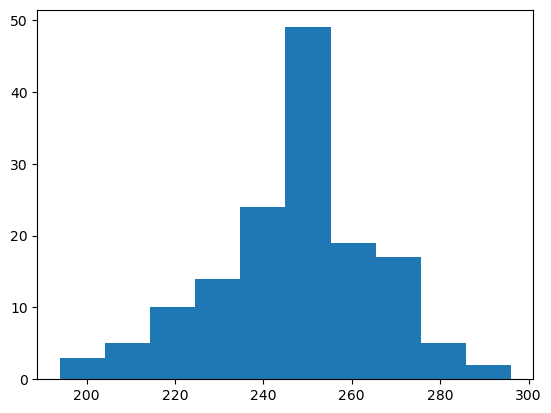

In [153]:
import matplotlib.pyplot as plt
plt.hist(df['8'])

In [154]:
df.agg([min, max])

C:\Users\james\AppData\Local\Temp\ipykernel_54396\513285256.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.agg([min, max])
C:\Users\james\AppData\Local\Temp\ipykernel_54396\513285256.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.agg([min, max])


Unnamed: 0                                                  0    1    2  \
min           0  C:\Users\james\OneDrive - University of Leeds\...   45  188   
max         147  C:\Users\james\OneDrive - University of Leeds\...  155  282   

       3    4   5    6    7    8  ...   27   28   29   30   31   32   33   34  \
min   57  245   7  119  161  194  ...  122  232   10   53  153  198   91  230   
max  110  313  45  149  261  296  ...  193  293  105  148  253  289  222  304   

      35   36  
min   12   59  
max  104  147  

[2 rows x 38 columns]

In [163]:
# total region all masks span
# dim1

dim1 = (
    min(min(df['25']), min(df['31'])), 
    max(max(df['26']), max(df['32']))
)

dim2 = (
    min(min(df['27']), min(df['33'])), 
    max(max(df['28']), max(df['34']))
)

dim3 = (
    min(min(df['29']), min(df['35'])), 
    max(max(df['30']), max(df['36']))
)

In [164]:
dim1, dim2, dim3

((148, 289), (91, 304), (10, 148))

In [165]:
# total region all masks span
# dim1
dim1 = (
    min(min(df['1']), min(df['7']), min(df['13']), min(df['19']), min(df['25']), min(df['7'])), 
    max(max(df['2']), max(df['8']), max(df['14']), max(df['20']), max(df['26']), max(df['32']))
)

dim2 = (
    min(min(df['3']), min(df['9']), min(df['15']), min(df['21']), min(df['27']), min(df['33'])), 
    max(max(df['4']), max(df['10']), max(df['16']), max(df['22']), max(df['28']), max(df['34']))
)

dim3 = (
    min(min(df['5']), min(df['11']), min(df['17']), min(df['23']), min(df['29']), min(df['35'])), 
    max(max(df['6']), max(df['12']), max(df['18']), max(df['24']), max(df['30']), max(df['36']))
)

In [166]:
dim1, dim2, dim3

((21, 296), (34, 313), (7, 149))

In [ ]:
dim1[1]-dim1[0]

141

In [ ]:
dim2[1]-dim2[0]

213

In [ ]:
dim3[1]-dim3[0]

138

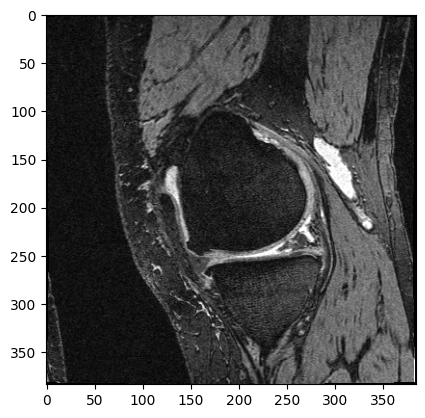

In [ ]:
# let's practice clipping, normalising and showing image
plt.imshow(img[...,100], vmin=0, vmax=0.005, cmap='gray')
plt.show()

In [ ]:
def crop_im(image):
    dim1_lower, dim1_upper = 120, 320
    dim2_lower, dim2_upper = 70, 326

    cropped = image[dim1_lower:dim1_upper, dim2_lower:dim2_upper, :]

    return cropped

In [ ]:
crop = crop_im(img)

In [ ]:
crop.shape

(200, 256, 160)

In [ ]:
def clip_and_norm(image, upper_bound):
    # Clip intensity values
    image = np.clip(image, 0, upper_bound)

    # Normalize the image to the range [0, 1]
    norm = (image - 0) / (upper_bound - 0)

    return norm

In [ ]:
norm_im = clip_and_norm(crop, 0.005)

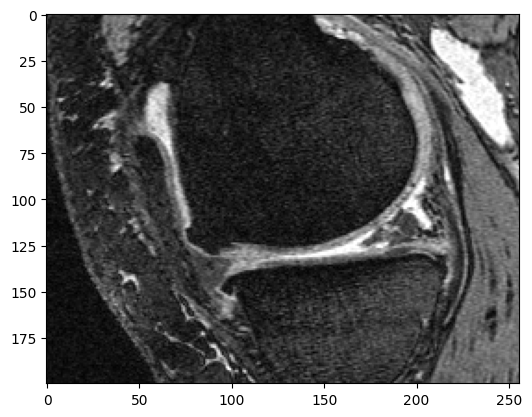

In [ ]:
plt.imshow(norm_im[...,100], cmap='gray')
plt.show()

In [ ]:
medial.shape
med_crop = crop_im(medial)

In [ ]:
lateral.shape
lat_crop = crop_im(lateral)

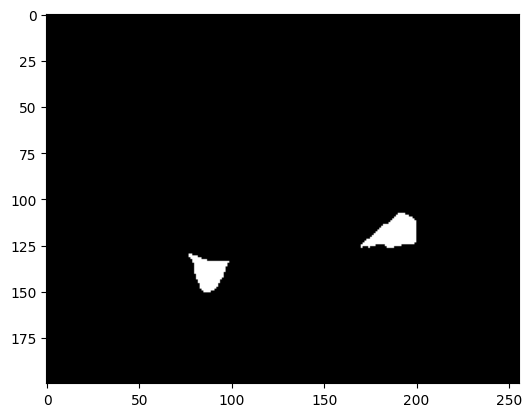

In [ ]:
plt.imshow(med_crop[...,100], cmap='gray')
plt.show()